<a href="https://colab.research.google.com/github/cjfghk5697/CS231n/blob/main/Lecture2-SVM_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CS231n Lecture Note
The last time We learn about image classification and CIFAR-10, etc. You remember W(weight)? W is very important in Machine Learning. But Sometimes W is uncorrect.To set more approach W. We need some new approach. <br>
The approach will have two major components: a score function that maps the raw data to class scores, and a loss function that quantifies the agreement between the predicted scores and the ground truth labels. We will then cast this as an optimization problem in which we will minimize the loss function with respect to the parameters of the score function.


#Loss Function
We can't control over the data(x,y). But we can control W, labels, etc. It's mean that We can control training data. Sometimes we  can get wrong outcomes. Therefore we have to measure outcomes. Called loss function( or cost function, objective). It will be low if we're doing well.

<h2>Multiclass Support Vector Machine loss(SVM)</h2>
The SVM loss is set up so that the SVM "wants" the correct class for each image to a have a score higher than the incorrect classes by some fixed marginΔ.

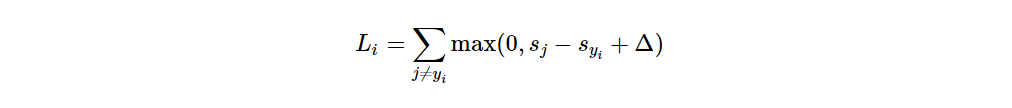

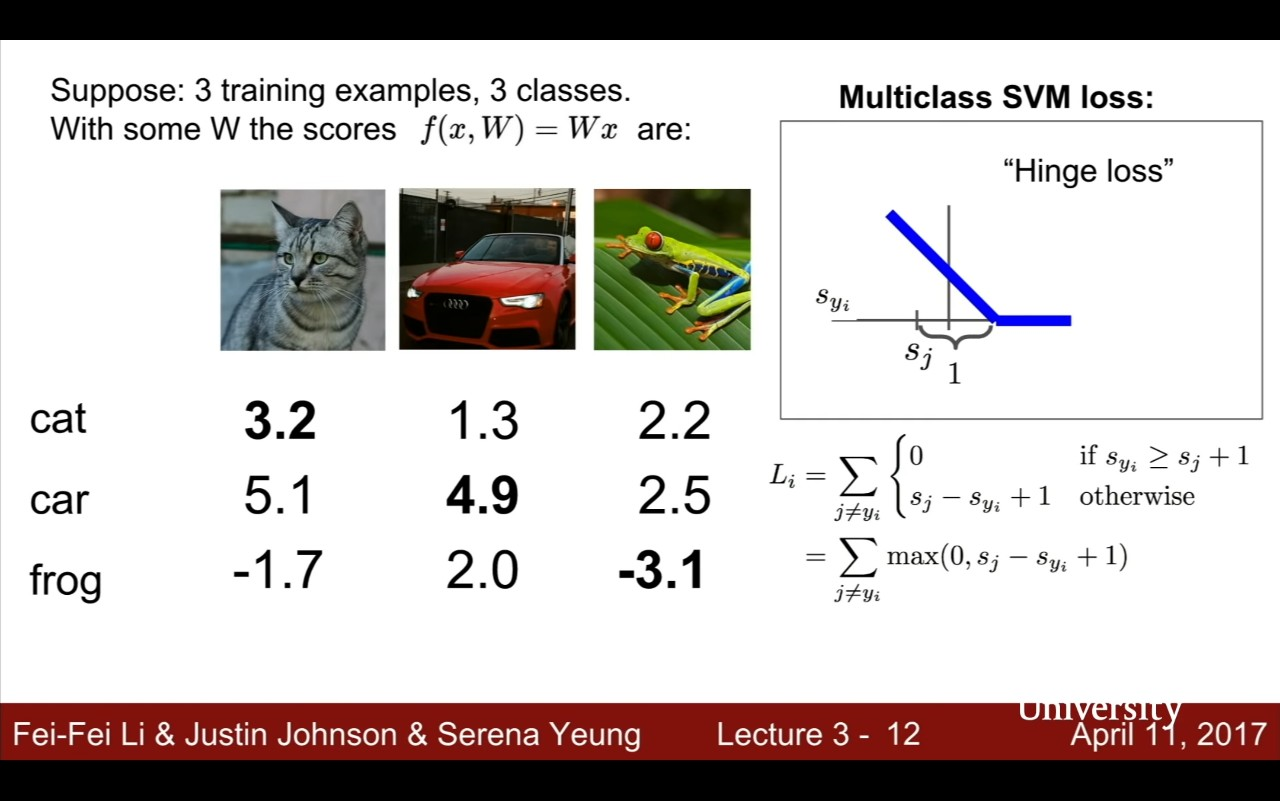



Example .<br>

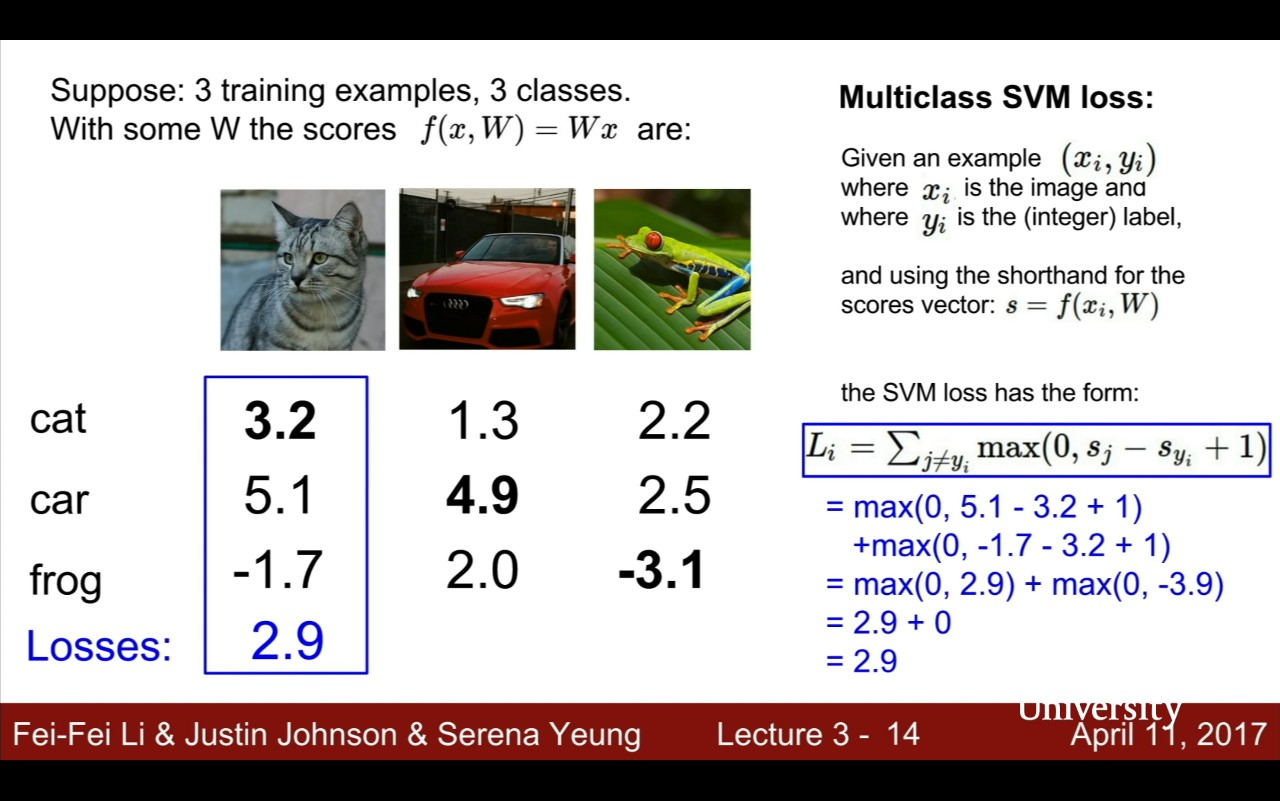

 if max(0,-) is get zero. Because correct answer W is higher than incorrect answer. In summary, the SVM loss function wants the score of the correct class yi to be larger than the incorrect class scores by at least by Δ (delta). If this is not the case, we will accumulate loss.

Note that in this particular module we are working with linear score functions ( f(xi;W)=Wxi ), so we can also rewrite the loss function in this equivalent form:

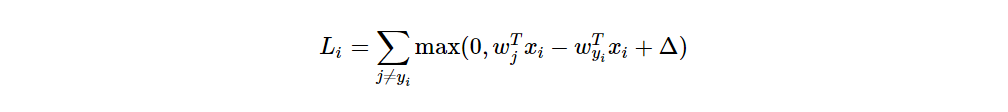

A last piece of terminology we’ll mention before we finish with this section is that the threshold at zero max(0,−) function is often called the hinge loss. Sometime hear about people instead using the squared hingle loss SVM(or L2-SVM), which uses the form max(0, -)^2 that penalizes violated margins more strongly.<br>
The unsquared version is more standard, but in some datasets the squared hinge loss can work better. This can be determined during cross-validation.

<br>
It has a issue. If Given all zero. It will be all of zeros. And It can't offer absolute value. For example, the difference in scores between a correct class and a nearest class wa 15, then multiplying all elements of W by 2 would make the new difference 30. So we can do so by extending the loss function with a regularization penaly R(W). The most common regularization penaly is the squared L2 norm that discourage large weight througn an elementwise quadratic penalty over all parameters:

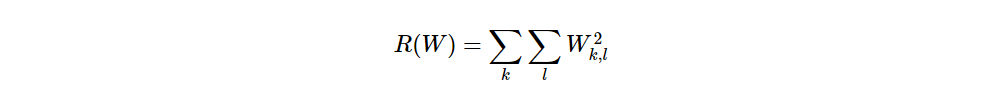

But this is only based on the W. So we need to include the regularization penalty complets the full SVM loss, whic is made up of two components: the data loss(average loss Li) and the regularization loss.

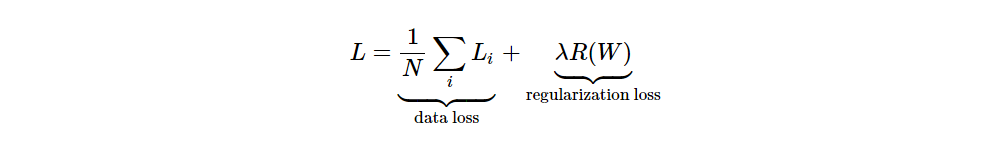

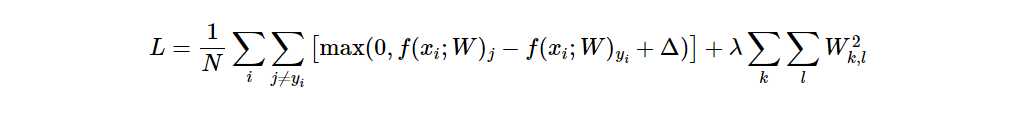

<q>

Where N is the number of training examples. As you can see, we append the regularization penalty to the loss objective, weighted by a hyperparameter λ. There is no simple way of setting this hyperparameter and it is usually determined by cross-validation.

In addition to the motivation we provided above there are many desirable properties to include the regularization penalty, many of which we will come back to in later sections. For example, it turns out that including the L2 penalty leads to the appealing max margin property in SVMs (See CS229 lecture notes for full details if you are interested).

The most appealing property is that penalizing large weights tends to improve generalization, because it means that no input dimension can have a very large influence on the scores all by itself. For example, suppose that we have some input vector x=[1,1,1,1] and two weight vectors w1=[1,0,0,0], w2=[0.25,0.25,0.25,0.25]. Then wT1x=wT2x=1 so both weight vectors lead to the same dot product, but the L2 penalty of w1 is 1.0 while the L2 penalty of w2 is only 0.5. Therefore, according to the L2 penalty the weight vector w2 would be preferred since it achieves a lower regularization loss. Intuitively, this is because the weights in w2 are smaller and more diffuse. Since the L2 penalty prefers smaller and more diffuse weight vectors, the final classifier is encouraged to take into account all input dimensions to small amounts rather than a few input dimensions and very strongly. As we will see later in the class, this effect can improve the generalization performance of the classifiers on test images and lead to less overfitting.

Note that biases do not have the same effect since, unlike the weights, they do not control the strength of influence of an input dimension. Therefore, it is common to only regularize the weights W but not the biases b. However, in practice this often turns out to have a negligible effect. Lastly, note that due to the regularization penalty we can never achieve loss of exactly 0.0 on all examples, because this would only be possible in the pathological setting of W=0</q>

In [ ]:
def L_i(x, y, W):
  """
  unvectorized version. Compute the multiclass svm loss for a single example (x,y)
  - x is a column vector representing an image (e.g. 3073 x 1 in CIFAR-10)
    with an appended bias dimension in the 3073-rd position (i.e. bias trick)
  - y is an integer giving index of correct class (e.g. between 0 and 9 in CIFAR-10)
  - W is the weight matrix (e.g. 10 x 3073 in CIFAR-10)
  """
  delta = 1.0 # see notes about delta later in this section
  scores = W.dot(x) # scores becomes of size 10 x 1, the scores for each class
  correct_class_score = scores[y]
  D = W.shape[0] # number of classes, e.g. 10
  loss_i = 0.0
  for j in range(D): # iterate over all wrong classes
    if j == y:
      # skip for the true class to only loop over incorrect classes
      continue
    # accumulate loss for the i-th example
    loss_i += max(0, scores[j] - correct_class_score + delta)
  return loss_i

def L_i_vectorized(x, y, W):
  """
  A faster half-vectorized implementation. half-vectorized
  refers to the fact that for a single example the implementation contains
  no for loops, but there is still one loop over the examples (outside this function)
  """
  delta = 1.0
  scores = W.dot(x)
  # compute the margins for all classes in one vector operation
  margins = np.maximum(0, scores - scores[y] + delta)
  # on y-th position scores[y] - scores[y] canceled and gave delta. We want
  # to ignore the y-th position and only consider margin on max wrong class
  margins[y] = 0
  loss_i = np.sum(margins)
  return loss_i

def L(X, y, W):
  """
  fully-vectorized implementation :
  - X holds all the training examples as columns (e.g. 3073 x 50,000 in CIFAR-10)
  - y is array of integers specifying correct class (e.g. 50,000-D array)
  - W are weights (e.g. 10 x 3073)
  """
  # evaluate loss over all examples in X without using any for loops
  # left as exercise to reader in the assignment